# Tutorial 2 - Solved Exercises


## Exercise 1 - FizzBuzz as a function

In the last tutorial you implemented FizzBuzz. As a reminder, these were the rules:

- If the number is divisible by 3, output "Fizz".
- If the number is divisible by 5, output "Buzz".
- If the number is divisible by both 3 and 5, output "FizzBuzz".
- If the number is neither divisible by 3 nor by 5, output the number itself.

Now your task is to create a function for it based on a sample implementation (alternatively, you can also use your implementation from last time as a starting point). The function should be called `fizzbuzz` and take a single parameter `x`. The result should be returned from the function. There should be no calls to `print` inside the function.

In [1]:
def fizzbuzz(x):
    if x % 3 == 0 and x % 5 == 0:
        return "FizzBuzz"
    elif x % 3 == 0:
        return "Fizz"
    elif x % 5 == 0:
        return "Buzz"
    else:
        return x

# After defining the function the below code should work
results = []
results.append(fizzbuzz(1))
results.append(fizzbuzz(5))
results.append(fizzbuzz(12))
results.append(fizzbuzz(15))

print(results) # This should produce [1, Buzz, Fizz, FizzBuzz]

[1, 'Buzz', 'Fizz', 'FizzBuzz']


## Exercise 2 - How fast? 🏎️ How slow? 🐌

In the lecture you heard that a binary search requires $O(log_2(n))$ operations. In this exercise you will verify that claim. Below you can see an image illustrating the difference between linear and logarithmic growth:

<div style="width: 600px; margin: 0 auto;">
<img src="attachment:4ec27477-768e-4065-850b-572a9c9aa2e5.png">
</div>

## Exercise 2.1 - Generating random lists

To verify the time complexity it will be necessary to generate random (sorted) lists. This will be done using a function. The idea is that you will be able to specify the number of values using the parameter `n` and the function will return the list.

Complete the function below. You can use `random.randint(a, b)`, which will generate a single value between `a` and `b`. Use the constant bounds in the cell as values for `a` and `b`. Further, you can use `list.sort()` to sort `list`. Execute the cell to make sure your code works!

In [2]:
import random # Required to use random.randint below

LOWER_BOUND = 0 # The lowest number we can generate
UPPER_BOUND = 100_000_000 # The highest number we can generate

def generate(n):
    values = []
    
    # Taks: Fill the values list with n random values between LOWER_BOUND and UPPER_BOUND
    for i in range(n):
        values.append(random.randint(LOWER_BOUND, UPPER_BOUND))
    
    # Task: Sort the values
    values.sort()
    
    return values

generate(10) # This will generate 10 random values once the function is fully implemented

[6055367,
 15114328,
 16377857,
 39762281,
 45409115,
 51774134,
 65726989,
 66084816,
 73230345,
 73297144]

## Aufgabe 2.2 - A first test

Below you can see an implementation for a binary search. Execute the cell so that the function is defined and can be used later.

In [3]:
# Returns whether the value was found
def search(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0
 
    while low <= high:
        mid = (high + low) // 2

        if arr[mid] < x:
            low = mid + 1
        elif arr[mid] > x:
            high = mid - 1
        else:
            return True # x was found
 
    return False # x was not found

First, measure a single binary search:

1. Use `generate(100_000)` to generate a bunch of random numbers.
2. Use `random.choice(arr)` to choose a random value out of the array.
3. Call `time.perf_counter()` before searching and store the time in `before`.
4. Use `search(arr, x)` to search the array for the value using binary search.
5. Call `time.perf_counter()` after searching and store the time in `after`.
6. `after - before` will give you the time it took to perform the search (in seconds). Convert the duration into milliseconds by multiplying by $1000$. How long did it take?

In [4]:
import time # Required to use time.perf_counter below

# Task: Measure the time (in milliseconds) for a single binary search
values = generate(100_000)
random_value = random.choice(values)

before = time.perf_counter()
search(values, random_value)
after = time.perf_counter()
duration = (after - before) * 1000 # The duration is milliseconds

print(duration)

0.11603999882936478


## Exercise 2.3 - The big test

After measuring a single search you can now measure the average of many searches. A basic structure for the test is already given below.

Complete the cell below to determine the average time for a binary search in 1000 values. Note that value down in the "Measured times" cell. Then change `n` to determine the average times for 10_000, 100_000 and 1_000_000.

What kind of growth in average time did you expect? What kind of growth did you observe? Is this what you expected?

In [5]:
n = 1_000 # The number of random values to generate
repetitions = 100 # How often the search will be repeated 
durations = [] # The durations for each search will be stored here

for _ in range(repetitions):
    # Task: Generate a random list of size n
    values = generate(n)
    
    # Task: Measure the time it takes to search through it
    before = time.perf_counter()
    search(values, random_value)
    after = time.perf_counter()
    duration = (after - before) * 1000
    
    # Task: Append that time to the durations list
    durations.append(duration)

# Task: Using the list of durations determine the total (in seconds) and the average time (in milliseconds). Output both values.
print('Total time:', sum(durations) / 1000, 'seconds')
print('Avg. time:', sum(durations) / len(durations), 'milliseconds')

Total time: 0.0006226733094081283 seconds
Avg. time: 0.006226733094081283 milliseconds


### Measured times

Below you can find the times I measured. In total, $n$ grows by a factor of $1000$ while the duration only grows by a factor of ca. $6.4$. The orange curve is a logarithmic curve (determined using regression) that shows that the time complexity grows (almost perfectly) logarithmically. This means that adding additional elements has less and less effect on search times as the list becomes larger.

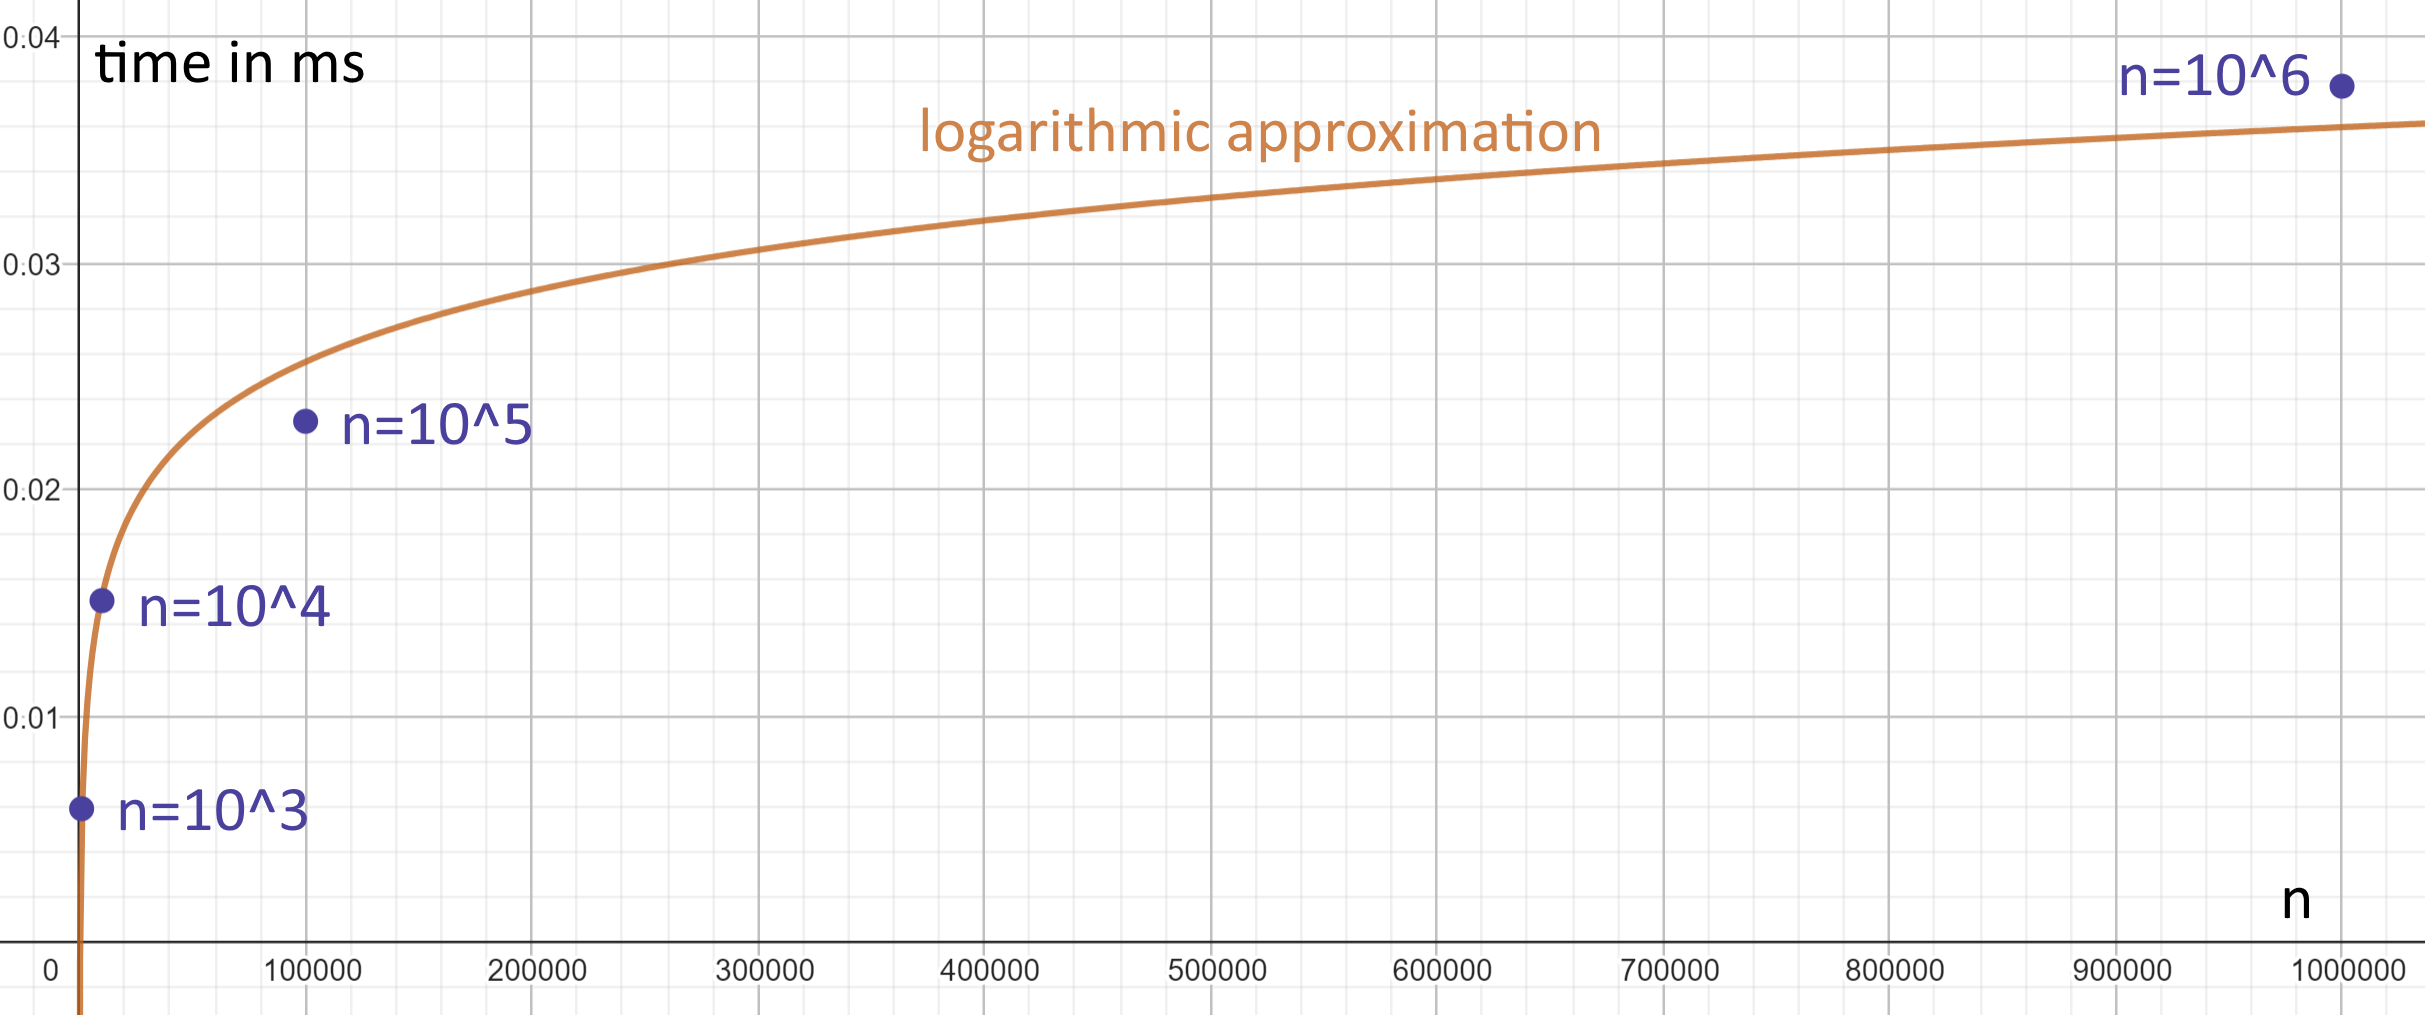

And here are the exact values for the graph:

| n | Avg. Time (ms) |
| - | -------------- |
| 1_000 | 0.00590 |
| 10_000 | 0.01509 |
| 100_000 | 0.02301 |
| 1_000_000 | 0.03781 |

